# PROJECT : California Housing Price Regression

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from graphpkg.static import plot_distribution, multi_distplots

from sklearn.datasets import fetch_california_housing

## Loading Data

In [24]:
dataset = fetch_california_housing()

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df[dataset.target_names[0]] = dataset.target

df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
features_df = df[dataset.feature_names]
target_df = df[dataset.target_names]

## Exploratory Data Analysis

In [4]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


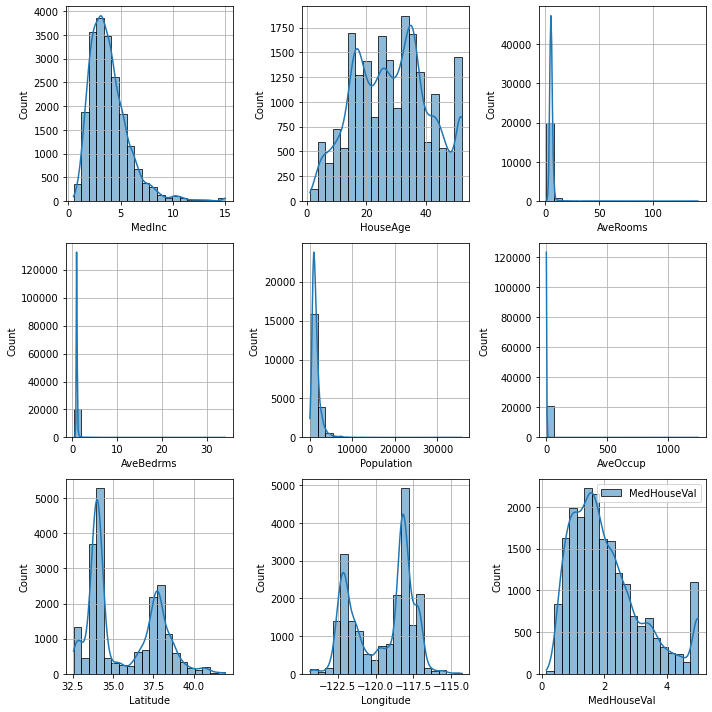

In [7]:
multi_distplots(df, n_cols=3, figsize=(10, 10))

## Removing outliers based on distributions

In [8]:
df = df[df['Population'] < 3000] 
df = df[df['AveBedrms'] < 2]
df = df[df['AveRooms'] < 12]
df = df[df['AveOccup'] < 6]

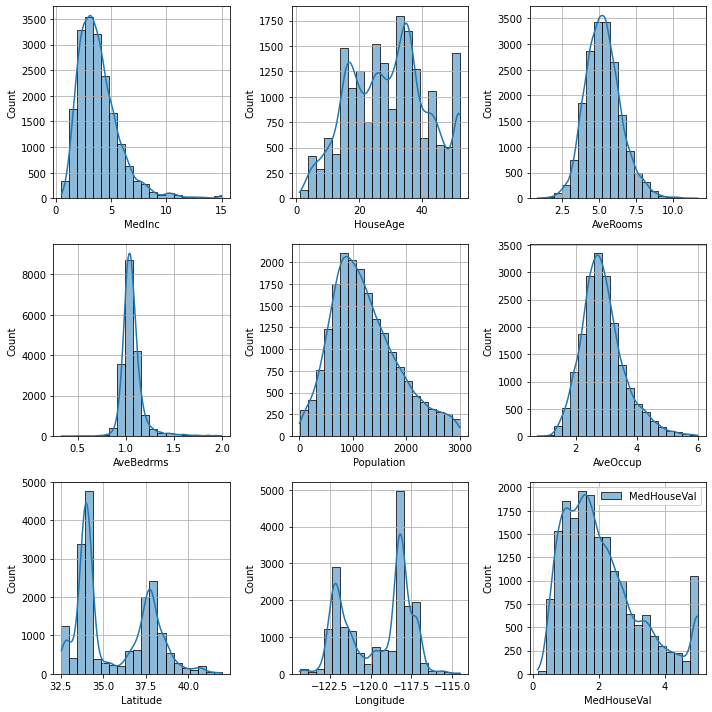

In [9]:
multi_distplots(df, n_cols=3, figsize=(10, 10))

In [10]:
df.shape

(18956, 9)

## Correlation plot

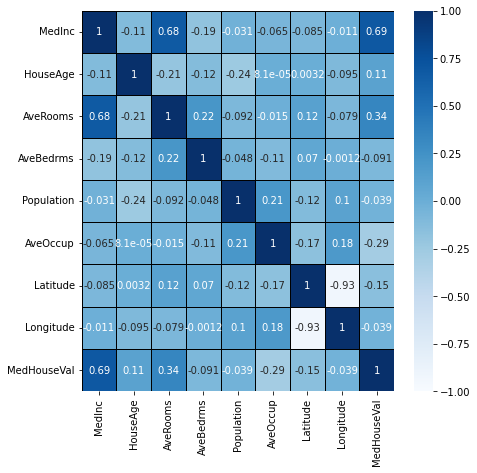

In [11]:
_,ax = plt.subplots(1,1, figsize=(7,7))
sns.heatmap(df.corr(), annot=True, cmap='Blues', vmax=1, vmin=-1, linecolor='black', linewidths=1)

plt.show()

## Scaling analysis

In [12]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

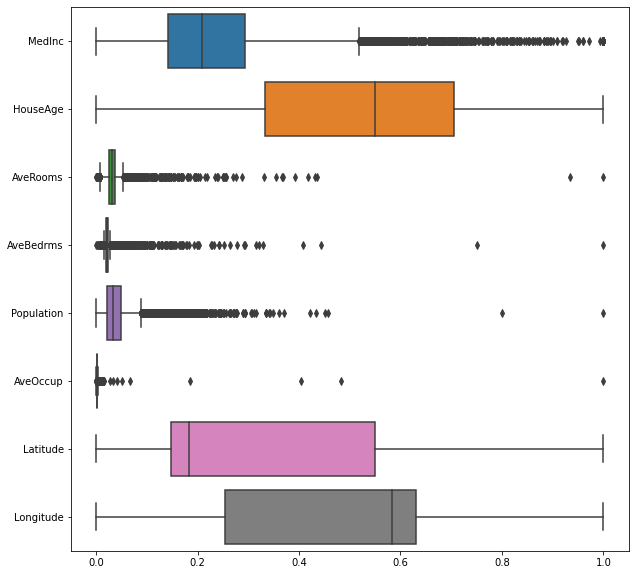

In [13]:
minmax_scaled_df = pd.DataFrame(MinMaxScaler().fit_transform(
    features_df), columns=features_df.columns)
_, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.boxplot(data=minmax_scaled_df, orient='horizontal', ax=ax)
plt.show()


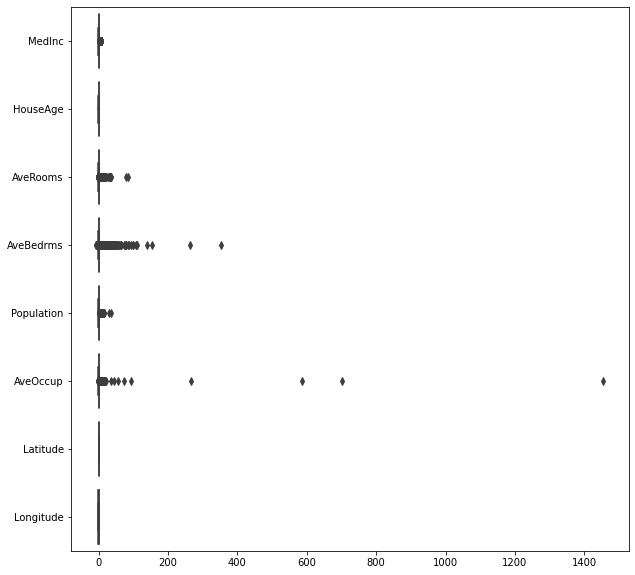

In [14]:
robust_scaled_df = pd.DataFrame(
    RobustScaler().fit_transform(features_df), columns=features_df.columns)
_, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.boxplot(data=robust_scaled_df, orient='horizontal', ax=ax)
plt.show()


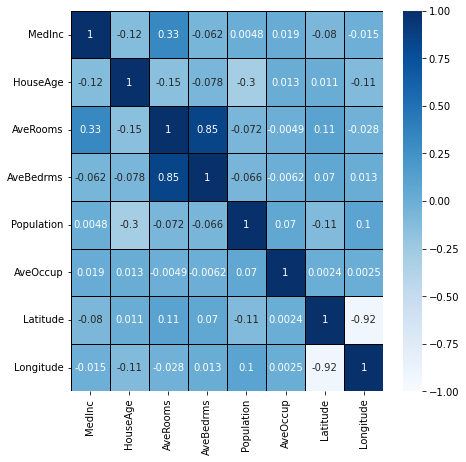

In [15]:
_, ax = plt.subplots(1, 1, figsize=(7, 7))
sns.heatmap(robust_scaled_df.corr(), annot=True, cmap='Blues', vmax=1,
            vmin=-1, linecolor='black', linewidths=1)

plt.show()


## Model Building

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [73]:
x_train, x_test, y_train, y_test = train_test_split(features_df, target_df.values.ravel(), test_size=0.2, random_state=15)

In [88]:
def plot_model_performance(model, x_train, x_test, y_train, y_test):
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    print(f"""
    Training Results :
        RMSE        : {np.sqrt(mean_squared_error(y_pred=y_train_pred, y_true=y_train))}
        MAE         : {mean_absolute_error(y_pred=y_train_pred, y_true=y_train)}
        R2 Score    : {r2_score(y_pred=y_train_pred, y_true=y_train)}

    Testing Results
        RMSE        : {np.sqrt(mean_squared_error(y_pred=y_test_pred, y_true=y_test))}
        MAE         : {mean_absolute_error(y_pred=y_test_pred, y_true=y_test)}
        R2 Score    : {r2_score(y_pred=y_test_pred, y_true=y_test)}

    """)

    _, ax = plt.subplots(2, 2, figsize=(10, 10))
    ax[0][0].plot(y_train_pred, label='predicted')
    ax[0][0].plot(y_train, label='original')
    ax[0][0].set_title('Training results')

    ax[0][1].plot(y_test_pred, label='predicted')
    ax[0][1].plot(y_test, label='original')
    ax[0][1].set_title('Testing results')


    ax[1][0].plot(y_train_pred, y_train, 'ko')
    ax[1][1].plot(y_test_pred, y_test, 'ko')

    plt.tight_layout()
    plt.show()


### Linear Regression


    Training Results :
        RMSE        : 0.7216591077622591
        MAE         : 0.5307279777233909
        R2 Score    : 0.609015680831374

    Testing Results
        RMSE        : 0.7342283181120794
        MAE         : 0.5354936151975909
        R2 Score    : 0.594578700066559

    


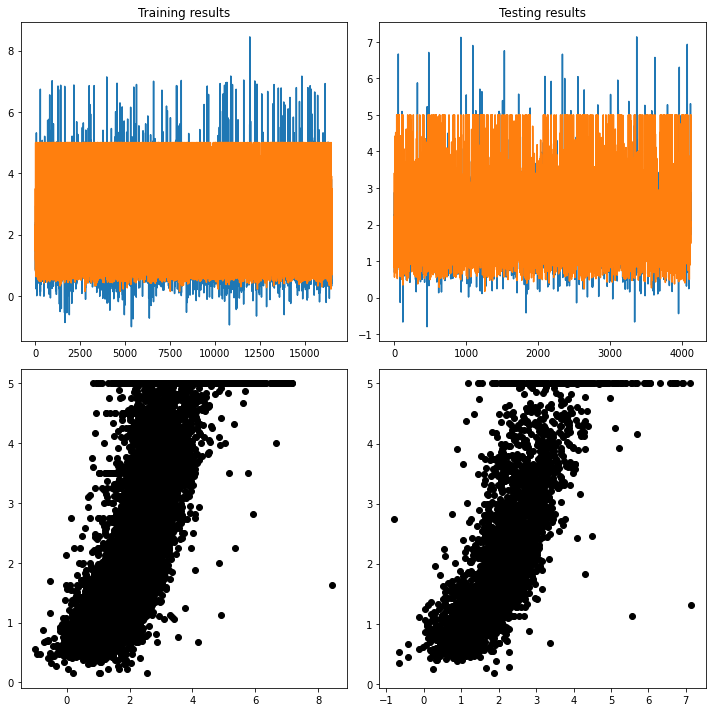

In [89]:

lr_model = Pipeline([
    ('scaler', RobustScaler()),
    ('linear regression model', LinearRegression())
])

lr_model.fit(x_train, y_train)
plot_model_performance(lr_model, x_train, x_test, y_train, y_test)


### Support Vector Regression


    Training Results :
        RMSE        : 0.6521733301459235
        MAE         : 0.45578752335766953
        R2 Score    : 0.6806836064530898

    Testing Results
        RMSE        : 0.666934014272314
        MAE         : 0.46428660419446766
        R2 Score    : 0.6654892835493937

    


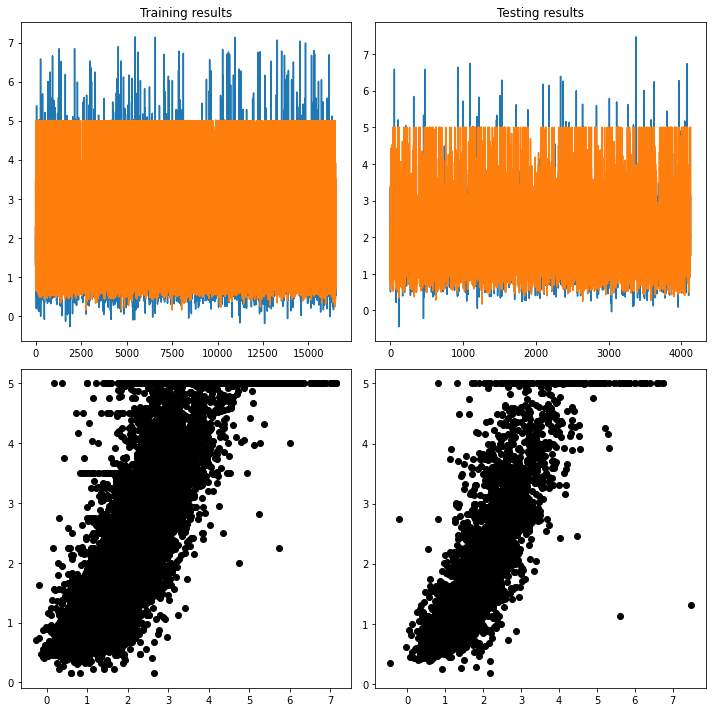

In [90]:

svr_model = Pipeline([
    ('scaler', RobustScaler()),
    ('Support Vector Regression Model', SVR())
])

svr_model.fit(x_train, y_train)
plot_model_performance(svr_model, x_train, x_test, y_train, y_test)



### Random Forest Regression


    Training Results :
        RMSE        : 0.18475791115851461
        MAE         : 0.11991711713905098
        R2 Score    : 0.9743727955933517

    Testing Results
        RMSE        : 0.5193781405995271
        MAE         : 0.33619724016472896
        R2 Score    : 0.7971328933881345

    


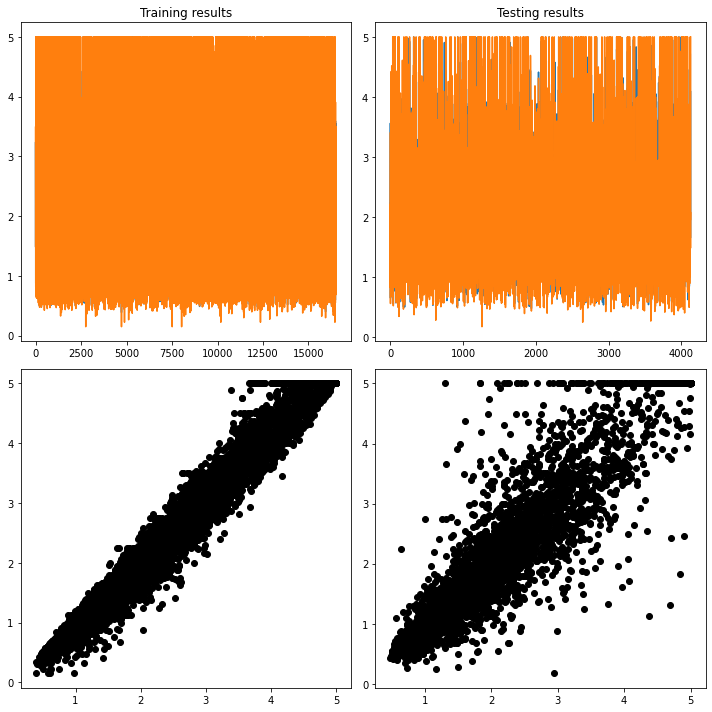

In [91]:

rf_model = Pipeline([
    ('scaler', RobustScaler()),
    ('Model', RandomForestRegressor(n_estimators =200))
])

rf_model.fit(x_train, y_train)
plot_model_performance(rf_model, x_train, x_test, y_train, y_test)


### Random Forest Regression without scaling


    Training Results :
        RMSE        : 0.1848969890416372
        MAE         : 0.11944888243701612
        R2 Score    : 0.9743341989368157

    Testing Results
        RMSE        : 0.5186455291967855
        MAE         : 0.33498797728924445
        R2 Score    : 0.7977048001499112

    


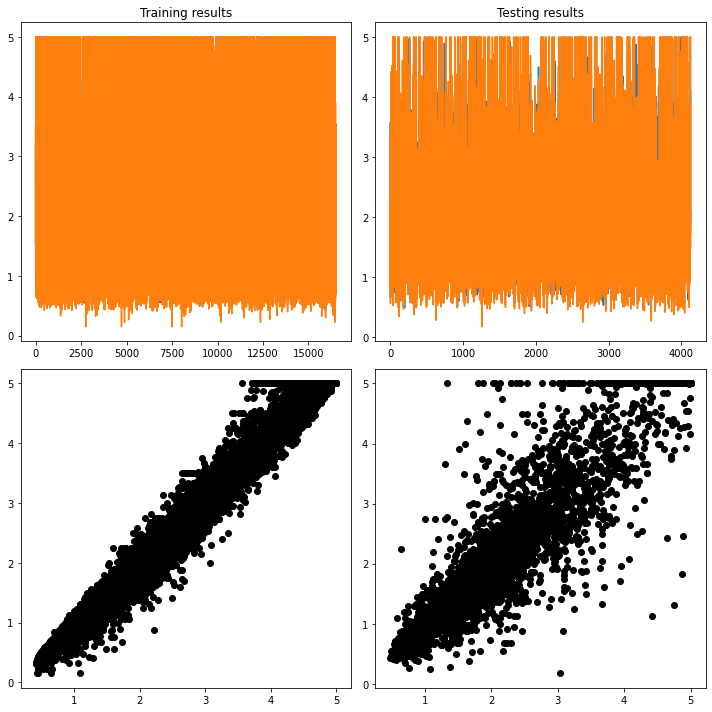

In [92]:
rf_model = Pipeline([
    ('Model', RandomForestRegressor(n_estimators =200))
])

rf_model.fit(x_train, y_train)
plot_model_performance(rf_model, x_train, x_test, y_train, y_test)
